#  <center>RECONNECT</center>
## <center>*Report for e-science course* </center>

## Abstract
text text text

## Acknowledgements
Data
Group members+supervisors
Scripts

## Introduction

The Artcic has during the last decades experienced a faster warming than any other part of the globe [REF]. The response to increased temperature in the Arctic environment implies reduction of sea ice cover and glaciers, melting permafrost and ecological pressure on the Arctic environment and species [REF]. Moreover, the interaction between the atmosphere, ocean and land is affected [bla bla marine production etc…………….]. 

The Arctic is in many ways an extreme environment which is also reflected in the annual cycle of airborne particulate matter. During the dark months, ocean and air circulation patterns implies an influx of anthropogenic pollutants, and the aerosol size distribution is dominated by accumulation mode particles. In combination with the Arctic wintertime meteorological conditions, this leads to the formation of a persistent Arctic haze. As the sun gradually returns, the circulation and airmass transport patterns changes and the anthropogenic pollution inflow is restricted [REF]. Formation of low-level clouds during summertime leads to removal of accumulation mode particles by wet scavenging marks the end of the Arctic Haze period [REF]. Consequently, the composition, properties, and size distribution of Arctic aerosol particle change. The lower aerosol load and increased availability of sunlight promotes photochemistry and results in a peak of in aerosol particles smaller than 100 nm [REF]. [Blab la NPF + precursor gases]
 At the Zeppelin mountain station [add location] long- term measurements are conducted to monitor the properties of aerosol particles, gaseous species and meteorological parameters (?). Long term measurements are valuable to discern changes…….


## Method

text text text

Describe what DMPS is and what bins are etc, cant be sassumed that reader knows what it is. Describe Zeppelin. 

### Import packages

And make sure that functions are auto-updated.

In [189]:
import DMPS_functions as fu
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime 
import seaborn as sns
import scipy as sc
import glob 
import sklearn.metrics as skm
from sklearn import metrics
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.cluster import KMeans
import scipy.stats as st
import seaborn as sns
from matplotlib import cm


# Auto-update the functions. Useful if the functions have been altered. 
%load_ext autoreload
%autoreload 2

plt.rcParams['font.size'] = '12'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# Defining the path containg all DMPS data
path = 'C:\\Users\\Lovisa\\Documents\\Courses II\\E_science_tools HT22\\Project\\DATA_ZEP_2010to2020\\'

In [3]:
# Using glob to import the files in the specified path
glob.glob(path+'\\*')

['C:\\Users\\Lovisa\\Documents\\Courses II\\E_science_tools HT22\\Project\\DATA_ZEP_2010to2020\\DMPS_and_CPC_2010_QA_QC@STP_HARMONIZED_PT20210207.dat',
 'C:\\Users\\Lovisa\\Documents\\Courses II\\E_science_tools HT22\\Project\\DATA_ZEP_2010to2020\\DMPS_and_CPC_2011_QA_QC@STP_HARMONIZED_PT20210207.dat',
 'C:\\Users\\Lovisa\\Documents\\Courses II\\E_science_tools HT22\\Project\\DATA_ZEP_2010to2020\\DMPS_and_CPC_2012_QA_QC@STP_HARMONIZED_PT20210207.dat',
 'C:\\Users\\Lovisa\\Documents\\Courses II\\E_science_tools HT22\\Project\\DATA_ZEP_2010to2020\\DMPS_and_CPC_2013_QA_QC@STP_HARMONIZED_PT20210207.dat',
 'C:\\Users\\Lovisa\\Documents\\Courses II\\E_science_tools HT22\\Project\\DATA_ZEP_2010to2020\\DMPS_and_CPC_2014_QA_QC@STP_HARMONIZED_PT20210207.dat',
 'C:\\Users\\Lovisa\\Documents\\Courses II\\E_science_tools HT22\\Project\\DATA_ZEP_2010to2020\\DMPS_and_CPC_2015_QA_QC@STP_HARMONIZED_PT20210207.dat',
 'C:\\Users\\Lovisa\\Documents\\Courses II\\E_science_tools HT22\\Project\\DATA_ZEP_2010

Loading each year of 30 min resolution DMPS data into a dataframe and create a list containing all dataframes.
Column headings are added, and data flagged as invalid is removed.

In [4]:
DFs_DMPS = fu.load_and_append_DMPS(path, 
                             name_in_file='DMPS')

['Year', 'Month', 'Day', 'Hour', 'Minute', 'UFCPC', 'CPC3010', 'Ntot', 'unknown4', 'unknown5', 'unknown6', 'unknown7', 'unknown8', '5.0118723e-09', '5.6234133e-09', '6.3095734e-09', '7.0794578e-09', '7.9432823e-09', '8.9125094e-09', '1.0000000e-08', '1.1220185e-08', '1.2589254e-08', '1.4125375e-08', '1.5848932e-08', '1.7782794e-08', '1.9952623e-08', '2.2387211e-08', '2.5118864e-08', '2.8183829e-08', '3.1622777e-08', '3.5481339e-08', '3.9810717e-08', '4.4668359e-08', '5.0118723e-08', '5.6234133e-08', '6.3095734e-08', '7.0794578e-08', '7.9432823e-08', '8.9125094e-08', '1.0000000e-07', '1.1220185e-07', '1.2589254e-07', '1.4125375e-07', '1.5848932e-07', '1.7782794e-07', '1.9952623e-07', '2.2387211e-07', '2.5118864e-07', '2.8183829e-07', '3.1622777e-07', '3.5481339e-07', '3.9810717e-07', '4.4668359e-07', '5.0118723e-07', '5.6234133e-07', '6.3095734e-07', '7.0794578e-07', 'flag']
C:\Users\Lovisa\Documents\Courses II\E_science_tools HT22\Project\DATA_ZEP_2010to2020\DMPS_and_CPC_2010_QA_QC@STP

### Concatenate DMPS data 
From the list containg one datafram per year, one datframe containg data from all years is created. The columns headings for the bin midpoint diameters are given in the  are renamed to names that are easier to handle

In [5]:
# Concatenate all the dataframes in list DFs_DMPS to one dataframe and drop unnessesary columns.
df_DMPS = fu.concat_df_DMPS(DFs_DMPS)

Define useful variables and rename the column headings to ease calling of specific columns:

In [6]:
# Get a list with the DMPS bin column names as strings 
bin_col_list = fu.get_bin_column_string_list()

# Rename the column headings for midpoint diameters to numeric values with less decimals.
df_DMPS = fu.renameDpColumns(df_DMPS, bin_col_list)

# Make a list of all the "real" non-rounded midpoint diameters as a list and as array.
diameterList, diameters = fu.getFloatDiameterListAndArray()

# Make a list of diameters as string-objects
diameters_as_strings = [str(x) for x in diameters]

### Resampling 
The function ``resample`` was used to convert the 30 min DMPS data to dataframes containing the daily mean, median and 1 hour average. The python function ``resample`` fills the gaps in the data by adding rows for gap days/months/hours with NaN-values to get a continous dataset. Because of this, rows containing only NaN values are dropped. 

In [7]:
df_daily_2010_2020_mean   = df_DMPS.resample('D').mean()
df_daily_2010_2020_mean   = df_daily_2010_2020_mean.dropna(how='all')

df_daily_2010_2020_median = df_DMPS.resample('D').median()
df_daily_2010_2020_median = df_daily_2010_2020_median.dropna(how='all') 

df_hourly_2010_2020_mean  = df_DMPS.resample('H').mean()
df_hourly_2010_2020_mean  = df_hourly_2010_2020_mean.dropna(how='all')

Describe what the columns are in the data? Maybe this should be done at an earlier stage..

## Method

Some different methods are tested to identify the NPF events: 
* By calculation of $\frac{N_{D_p<10nm}}{N_{tot}}$ 
* By using K-means clustering
* By calculating the difference between the UF-CPC and the CPC 

The first method requires that the total number concentration $N_{tot}$ is calculated for a given diameter range. For that the log-normal distribution which is provided by the DMPS have to be integrated. Linn Karlsson (e-Science course participant 2017) should be acknowledged for inspiration to the method used in this work (Linn's method invloved the use of dictionaries but here arrays are used instead).  

The ``calcNtot`` calculates the particle concentration by integrating in a given bin midpoint diameter interval and adds a column in the dataframe containg the calculated values. 

In [8]:
# Calculate the total particle number concentration for:

# Daily median
df_daily_2010_2020_median_ntotCalc = fu.calcNtot(diameters, df_daily_2010_2020_median,diameters_as_strings)

# 30 min resolution data
df_DMPS_ntotCalc                   = fu.calcNtot(diameters, df_DMPS,diameters_as_strings) 

# 1 h resolution data
df_hourly_2010_2020_mean_ntotCalc  = fu.calcNtot(diameters, df_hourly_2010_2020_mean,diameters_as_strings) 

### Quality control of calcNtot function for 1h data

R-squared: 0.999363
Intercept: 0.0445901316076629
Slope: 1.0004705430431775


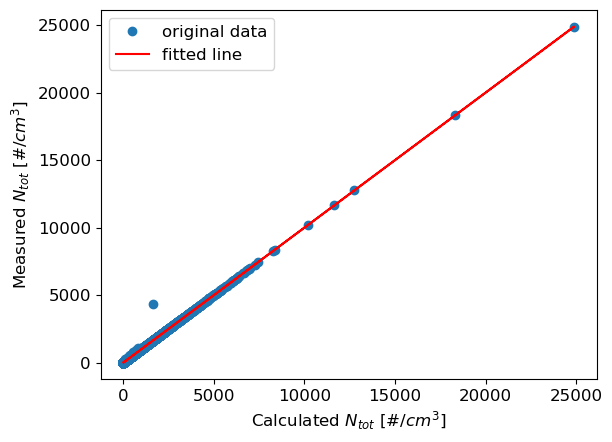

In [150]:
varx = df_hourly_2010_2020_mean_ntotCalc['NtotCalc'].values
vary = df_hourly_2010_2020_mean_ntotCalc['Ntot'].values

fu.compareIntegration(varx,vary)

### Compare $N_{D_P <x}/N_{tot}$ and compare UFCPC CPC

Integration of lognormal size distribution --> ($N_{D_P <x}$) 

The aim is to calculate the total particle number concentration (#/$cm^3)$ up to $x$ nm ($N_{D_P <x}$) and compute $N_{D_P <x}/N_{tot}$ to identify NPF events.  

In [10]:
bin_cols = fu.get_bins(bin_col_list)
bin_cols = [float(x) for x in bin_cols]

## K-means clustering

The purpose of using the K-means clustering is to identify NPF events in the long-term DMPS dataset. This approach was previously deployed by Dall'Osto et al. (2017). **Describe why and how. Shortly.**

Prior to applying the K-means clustering the size distribution data must be normalized, and the optimal numbers of clusters needs to be determined. Normalization of DMPS size distributions implies clustering by shape.  

### Normalizing the size distributions

In [11]:
df1, df_daily_2010_2020_median_norm = fu.create_normalised_df(df_daily_2010_2020_median)
df2, df_daily_2010_2020_mean_norm = fu.create_normalised_df(df_daily_2010_2020_mean)
df3, df_daily_2010_2020_1h_mean_norm = fu.create_normalised_df(df_hourly_2010_2020_mean)

For the hourly averaged data some endpoint columns where dropped in order for the clustering to work. Apparently the K-means method is very sensitive to the concentrations in the endpoints. This might indicate that the clustering method is not too robust. Normally particle number concentrations are low in the end bins, and by dropping them it is reasonable to assume that the overall size distribution shape should be preserved anyhow.  

In [12]:
df_hourly_norm_dropped = df_daily_2010_2020_1h_mean_norm.copy()
df_hourly_norm_dropped = df_hourly_norm_dropped.drop \
                         (columns=['norm5.012','norm630.957','norm707.946'])

### Optimizing the number of clusters 

The optimal cluster number *k* for K-means clustering needs to be decided upon. This could be done using several methods. Here the inertia method and the average silhouette score is used. 

The inertia method implies calculating the mean squeared distance of each clusters to its nearest centroid **mening?** A good clustering model has a low inertia and low number of clusters. If *k* = number of clusters equals the number datapoints the inertia equals zero, so while choosing the optimal *k* there is a trade off between inertia and number of clusters. To find the optimal *k* the elbow should be identified, where the increase in *k* implies a slower decrease in inertia. 

The Silouette score generates a number between -1 and 1. The closer the Silouette score is to 1, the better cluster are distiguished from each other. A score of 0 implies that clusters are not well distinguished and -1 that clusters are wrongly assigned. Here, the average silouette score is computed which informs on the average spearation of all clusters. Ideally the Silouette score is calulated for individual samples as well (out of the scope of this work) to optimize the choice of *k*.

Optimization was done for *k* between 2 and 13 clusters. 

In [13]:
#fu.optimizeClusters(df_hourly_norm_dropped)   

From the inertia method it is not straightforward to define the elbow, where adding more clusters results in a minor decrease of inertia. It is clear that the average silhoutette score of the clusters decrease with increasing number of clusters.
The optimal cluster number was here decided to *k* = 5, rather than 4 as inertia decrease less for each added cluster when *k* > 4. Six clusters did not improve the silouette score and five clusters is prefered over seven as inertia is higher when *k* = 5. 

## Results

### Clustering
The clustering was performed using the optmized number of clusters. 

In [14]:
# Optimal cluster number 
n_clusters = 5

#Perform K-means clustering
silhouette_avg_1h, inertia1h, df_norm_clustered_1h_mean = fu.perform_clustering(df_hourly_norm_dropped, n_clusters)

# Define the unique number of size distribution clusters in the sence that peak diameter is different.
clusters = np.unique(df_norm_clustered_1h_mean['clusters'].values)

# Check that the number of clusters resulting from the clustering procedure is equal to the variable ``n_clusters``, 
# i.e. that the peak diameters of the clustered size distributions are unique. Print result.
fu.checkUniqueModeDiam(df_norm_clustered_1h_mean,n_clusters)

OK! Clusters peak for different diameter when number of clusters =  5


Each hourly distribution was assigned a cluster ID during the clustering. Define the mean, standard devitation, median, 10- and 90-percentiles of the clustered data for each cluster in order to visulize the results of the clustering procedure. 

In [15]:
df_norm_clustered_1h_mean_median = df_norm_clustered_1h_mean.groupby('clusters').median()
df_norm_clustered_1h_10q         = df_norm_clustered_1h_mean.groupby('clusters').quantile(.1)
df_norm_clustered_1h_90q         = df_norm_clustered_1h_mean.groupby('clusters').quantile(.9)

df_norm_clustered_1h_mean_mean   = df_norm_clustered_1h_mean.groupby('clusters').mean()
df_norm_clustered_1h_std         = df_norm_clustered_1h_mean.groupby('clusters').std()

Below, the mean +/- 1$\sigma$ (shaded area) of the normalized and clustered size distribution data is shown. The median is plotted as a dotted line for comparision. From the graph it is clear that median and mean are similar, and that cluster 1 and 2 may represent NPF events, although both 1 & 2 are bimodal and extends to the accumulation mode. Varying the cluster number did not remove the bimodality for the clusters whose normalized distributions peak occurs for $D_p$ < 100 nm. 

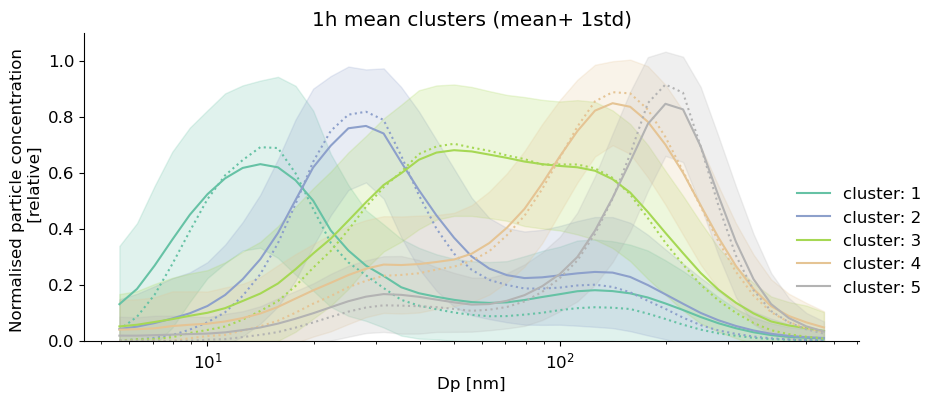

In [16]:
fu.plotClustersNormalized(df_norm_clustered_1h_mean, diameters,
                          df_norm_clustered_1h_mean_mean, df_norm_clustered_1h_std,
                          df_norm_clustered_1h_mean_median)

### Comparision of NPF proxies
This plot shows the 
grey black = integration method median + 10,90quantiles


An important conclusion is that the integration method was not succesful for the choice of thresholds equal to 10,20 or 30 nm. Here, an example with 10 nm is shown in black-gray bla bla. The annual trends showed peak in the dark months and therefore this method is discarded.

Taking the ration between the UF CPC and normal CPC to identify NPF was also dicarded as taking ratios between numbers with small differences makes it hard to discearn differences (?).

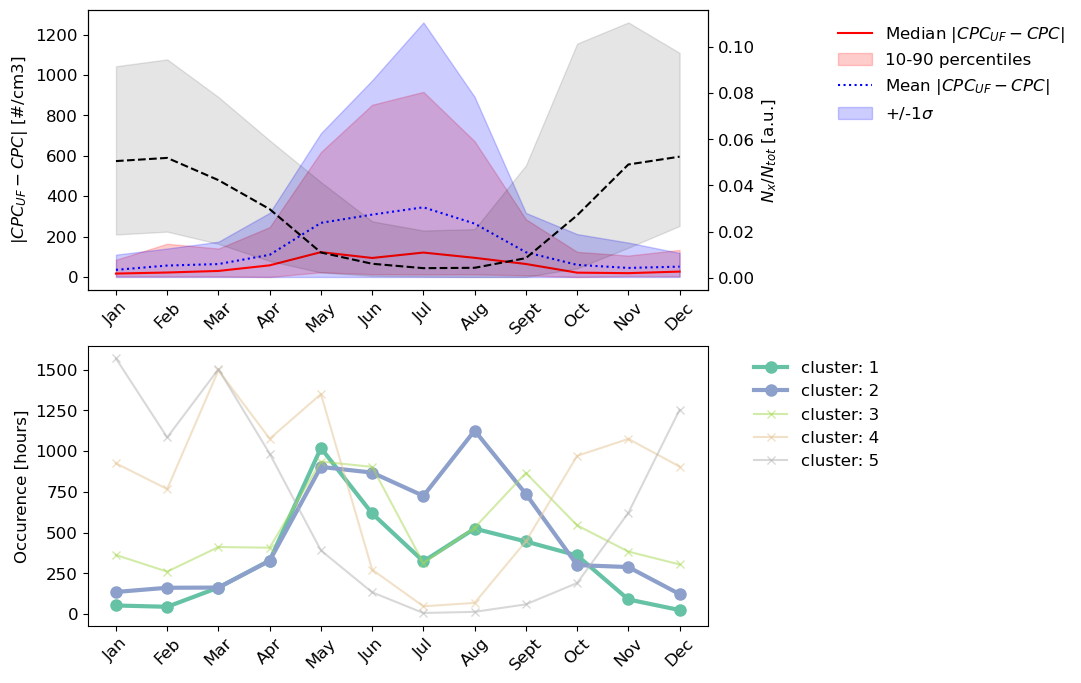

In [34]:
# Input DFs, clusters, threshold = 10 nm for when to integrate
fu.plotNPFproxys(df_hourly_2010_2020_mean,
              df_norm_clustered_1h_mean,
              clusters,
              bin_cols,10,diameters,diameters_as_strings)

The annual trend displyed as a normalized stacked bar plot, indicating the distribution of clusters. It is evident that cluster 1,2 dominate during the summer months althouf´gh cluster 3 appears to follow a similar trend. This introduce some doubt weather it actually is NPF events that the clustering captures or rather seasonal variation in the size distribution.

Cluster 4 and 5, follow the expected behavior: they dominate during the Arctic haze season. 

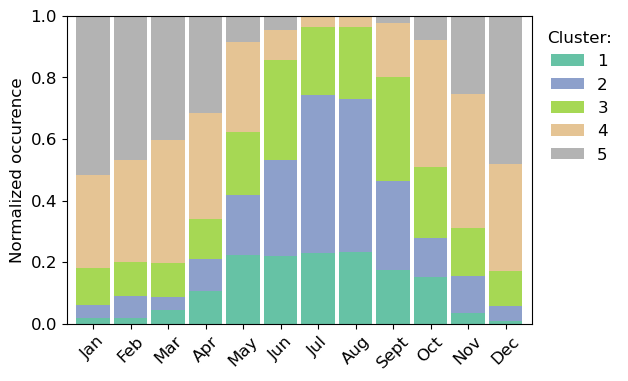

In [18]:
fu.makeStackedPlot(df_norm_clustered_1h_mean,clusters)

### Trend for NPF events

``df_clusters_seqMonth_T`` is the transformed version of ``df_clusters_seqMonth`` which contains one row for each sequential month in the dataset, and columns for all the clusters where the occurence of each cluster is given. It also contain a column which gives the total amount of hours and the month given by number. 

In [21]:
df_clusters_seqMonth, df_clusters_seqMonth_T = fu.prepareDFforTrendPlot(df_norm_clustered_1h_mean,clusters)

Choose months of interest in and a df which is normalized for the data coverage for plotting is returned by ``makeDFforTrend``. 

In [22]:
# Define the period of interest in terms of months
MJJ_list = [5,6,7]
all_months_list = [1,2,3,4,5,6,7,8,9,10,11,12]

df_norm_MJJ = fu.makeDFforTrend(df_clusters_seqMonth_T,MJJ_list)
df_norm_all = fu.makeDFforTrend(df_clusters_seqMonth_T,all_months_list)

In [23]:
#df_yearly_count_clusters.to_csv(r'C:\Users\Lovisa\Documents\GitHub\Tjaernoe2022-group3\df_yearly_count_clusters.csv', index = True, header=True)

In [25]:
# Plot the montly counts for diagnostics -months are colorored by colormap: Greens. Lighter = earlu months 

#Not a very good plot..
#fu.plotScatter(df_norm_all, clusters)

The Theil-Sen slope indicating the trend for the months May, Jun, July when chlorofyll emissions peak is plotted below for the sequential months.
The Thiel-Sen slope informs on.....
There is no information on sea ice extent, nor airmass origin nor NPF precurors here. 

Beacuse trend in chlorophyll are mixed , it might be that 

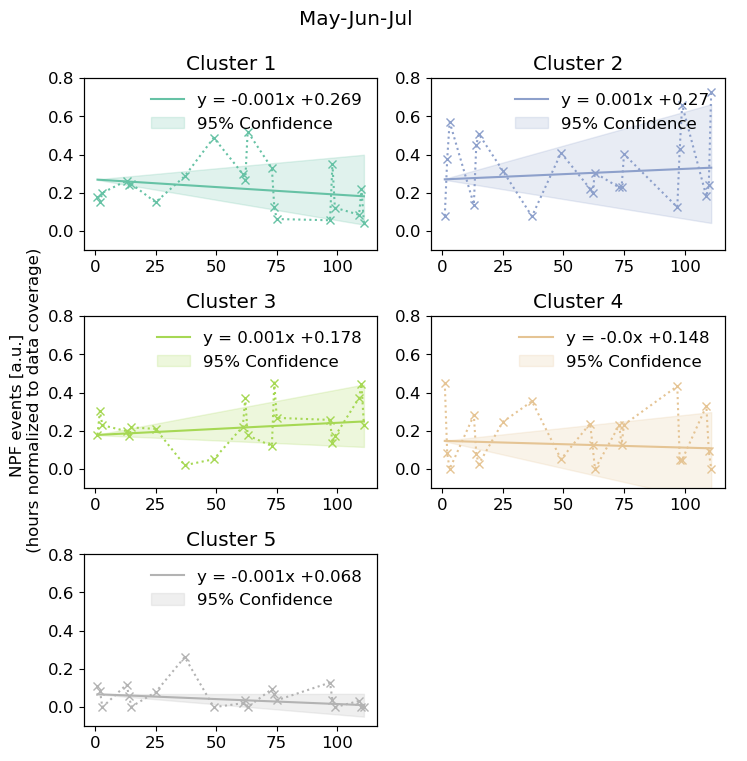

In [140]:
fu.plotThielSen(df_norm_MJJ, clusters,'May-Jun-Jul')

Plot the yearly NPF total for cluster 1,2 and their sum 

In [86]:
# Compute the monthly and yearly normalized count for all clusters
df_monthly_cluster_count = df_norm_all.copy(deep = True)
df_yearly_count_clusters = fu.DFAnnualCount(df_norm_all,clusters)

# Compute the total normlized count for cluster 1 and 2 by adding extra column and removing other clusters (=3,4,5)
monthly_cluster_count_12, df_yearly_cluster_count_12 = fu.sumCluster12(df_monthly_cluster_count,df_yearly_count_clusters)
sea_ice_annual = fu.readSeaIcetoDF()

In [133]:
sea_ice_annual.head(30)
#df_yearly_cluster_count_12.head(30)

,Year,Sea ice conc (%)
2000,2000,19.945577
2001,2001,20.239268
2002,2002,21.128214
2003,2003,23.926650
2004,2004,20.764033
2005,2005,20.440910
2006,2006,17.124192
2007,2007,18.706793
2008,2008,20.419494
2009,2009,20.110016


In [249]:
def plotNPFvsSeaIce(sea_ice_annual,df_yearly_cluster_count_12):
    df_sea_ice = sea_ice_annual.copy(deep = True)
    df_NPF = df_yearly_cluster_count_12.copy(deep= True)
    
    # Extract data for matching years
    start_year_NPF = df_NPF.index[0]
    end_year_NPF   = df_NPF.index[-1]
    
    start_year_sea_ice = df_sea_ice.index[0]
    end_year_sea_ice   = df_sea_ice.index[-1]
    
    start, end = find_overlap(start_year_NPF,end_year_NPF,start_year_sea_ice,end_year_sea_ice)
    #print(start,end)
    
    years_ice = df_sea_ice.index.values
    years_NPF = df_NPF.index.values
       
    mask_ice = (years_ice >= start) & (years_ice <= end)
    mask_NPF = (years_NPF >= start) & (years_NPF <= end)
    
#     print(years_ice[mask_ice])
#     print(years_NPF[mask_NPF])
    
    fig = plt.figure(figsize=(6, 4))
    
    ax = plt.subplot(1,1,1)
    
    ax.plot(df_sea_ice['Sea ice conc (%)'].values[mask_ice],
           df_NPF['12'].values[mask_NPF],
           'ko',label = 'Normalized NPF occurence \n (sum of cluster 1 and 2)')
    ax.set_xlabel('Sea ice concentration [%] \n (Barents Sea and Greenland Sea)')
    ax.set_ylabel("NPF events [a.u.] \n (hours normalized to data coverage)")
    
    varx = df_sea_ice['Sea ice conc (%)'].values[mask_ice]
    vary = df_NPF['12'].values[mask_NPF]
    
    # Add annotations
#     for xy in zip(varx, vary):                                       
#         ax.annotate('(%s, %s)' % xy, xy=xy, textcoords=labels_str) 
#    ax.annotate(text[i], (x[i], y[i] + 0.2))

    labels = years_ice[mask_ice]
    labels_str =[str(i) for i in labels] 
    
    for i in range(len(varx)):
        plt.annotate(labels_str[i], (varx[i], vary[i] + 0.2))
        
    # Fit regression line 
    res = sc.stats.linregress(varx, vary)
    print(res.pvalue)

#     print(f"R-squared: {res.rvalue**2:.6f}")
#     print('Intercept:',res.intercept)
#     print('Slope:',res.slope)

    ax.plot(varx,
             res.intercept + res.slope*varx,
             'r-', 
            label='y = '+str( round(res.slope, 3) )+'x +' +str(round(res.intercept,3))
           + ' \n $R^2$ = ' + str( round(res.rvalue**2,3) ) + ', $p$ = ' +str( round(res.pvalue,2) ) )
    ax.legend(frameon = False, bbox_to_anchor=(1.65, 1))
    plt.xlim(14.5,21.5)
    plt.ylim(-0.1,5.5)
    plt.show()

    return


One of our aim was to  investigate weather the anti-correlation betwen sea ice extent and NPF occurence found by Dall'Osto et al. (2017) holds true when more recent data is used from the Zeppelin station. Dall'Osto et al. (2017) investigated the years 2000-2010 and our study encompass 2010-2017. Here, the sea ice concentration from satellite data in the Barents and Greenland Sea (same region as studied by Dall'Osto et al. (2017)) is used instead of sea ice extent. We normalized the NPF observations to data coverage (in order to remove this dependence) from cluster 1 and 2 and use the annual sum of those as a proxy for NPF events.

The results shown below gives little confidence in the hypotheis that NPF at Zeppelin is anti-correlated with sea ice concentration in the studied region between 2010-2017 ($R^2$ = 0.21, $p$ = 0.25). The p-value is the two-sided p-value for a hypothesis test whose null hypothesis is that the slope is zero (no correlation). The calcaulated p-value and $R^2$ is not enough to reject this null-hypotheis. There are several explanations that are possible for this. For example, the sample size is quite low, or that there is no correlation between sea ice concetration in the studied region and NPF. Furthermore, it may be that the 1h-clusters to represent NPF events chose do not capture the NPF events. 
Airmass origin. 
Satellite data analysis of chlorophyll (by Kei satellite data  that more productive oceans in a warming Arctic would enhance NPF   
One option is to look at monthly data. 

0.2537697077894288


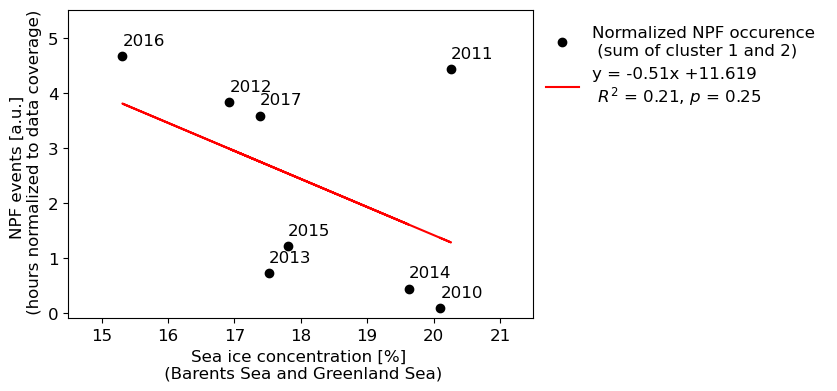

In [250]:
plotNPFvsSeaIce(sea_ice_annual,df_yearly_cluster_count_12)

In [99]:
def find_overlap(start_year_NPF,end_year_NPF,start_year_sea_ice,end_year_sea_ice):
    
    if start_year_NPF >= start_year_sea_ice:
        start = start_year_NPF
    else:
        start = start_year_sea_ice
            
    if end_year_NPF >= end_year_sea_ice:
        end = end_year_sea_ice
    else:
        end = end_year_NPF
        
    return start, end

In [27]:
# # Trend for MJJ

# # fig, ax = plt.subplots(figsize=(10,5))

# # ax.plot(df_norm_summer.index,df_norm_summer['1'].values,'o' )
# # ax.set_ylabel('Normalized frequency')
# # ax.set_xlabel('Datetime')
# # plt.show()

# # fig, ax = plt.subplots(figsize=(10,5))

# # #-----------Choosing the clusters---------------------------

# # cluster_name = '2'


# # ax.plot(df_norm_summer.index,
# #         df_norm_summer[cluster_name].values,
# #         'o',label='original data') 
# # ax.set_ylabel('Normalized frequency')
# # ax.set_xlabel('Datetime')
# # plt.show()

# # Fit a lin regression slope is not what we want -we don't want correlation -we want trend
# varx = np.arange(len(df_norm_summer.index))
# vary = df_norm_summer[cluster_name].values


# # For trend analysis we use theil zen slope
# slope, intercept, lo_slope, up_slope  = sc.stats.theilslopes(vary, varx, 0.95)

# # medslope :Theil slope.
# # medintercept : Intercept of the Theil line, as median(y) - medslope*median(x).
# # lo_slope : Lower bound of the confidence interval on medslope.
# # up_slope : Upper bound of the confidence interval on medslope.

# print('---------------------------')
# print('Theil-Sen slope')
# print('Slope:',slope)
# print('Intercept:',intercept)
# print('Lower bound of the confidence interval on medslopeLower:',lo_slope)
# print('Upper bound of the confidence interval on medslopeLower:',up_slope)
# print('---------------------------')

# # Plot the Theil-Sen slope (non-parametric)
# fig = plt.figure()
# ax = fig.add_subplot(111)
# ax.plot(varx, vary, 'b.',label='original data')
# ax.plot(varx, intercept + slope * varx, 'b-')

# ax.fill_between(varx, 
#                intercept + up_slope * varx,
#                intercept + lo_slope * varx,
#                alpha=0.2, label= '95% Confidence $')
# plt.show()
# ax.legend()

# # Test the sign of the slope



In [28]:
# df_norm_summer['year'] = df_norm_summer.index.year
# df_norm_summer['year'] = df_norm_summer['year'] - df_norm_summer['year'].iloc[0]
# df_norm_summer['month'] = df_norm_summer.index.month
# df_norm_summer['month_ordered'] = df_norm_summer['year']*12 + df_norm_summer['month'] 
# df_norm_summer['month_ordered'] = df_norm_summer['month_ordered'] - df_norm_summer['month_ordered'].iloc[0] + 1

In [29]:
# # slice
# df_norm_summer = df_norm_summer[df_norm_summer.index.year < 2018]

In [30]:
# cluster_name = '2'

# # Fit a lin regression slope is not what we want -we don't want correlation -we want trend
# varx = df_norm_summer['month_ordered'].values
# vary = df_norm_summer[cluster_name].values

# # For trend analysis we use theil zen slope
# slope, intercept, lo_slope, up_slope  = sc.stats.theilslopes(vary, varx, 0.95)

# print('---------------------------')
# print('Theil-Sen slope')
# print('Slope:',slope)
# print('Intercept:',intercept)
# print('Lower bound of the confidence interval on medslopeLower:',lo_slope)
# print('Upper bound of the confidence interval on medslopeLower:',up_slope)
# print('---------------------------')


# # Plot the Theil-Sen slope (non-parametric)
# fig = plt.figure(figsize=(10,4))

# ax = fig.add_subplot(111)
# ax.plot(df_norm_summer.index, df_norm_summer[cluster_name].values, 'x-', ls=':')
# ax.set_ylabel('NPF events (normalized hours)')

# ax2 = ax.twiny()
# ax2.plot(varx, intercept + slope * varx, 'b-', ls='-', alpha=1, 
#          label='y = '+str( round(slope, 3) )+'x +' +str(round(intercept,3) ))
# ax2.fill_between(varx, 
#                intercept + up_slope * varx,
#                intercept + lo_slope * varx,
#                alpha=0.2, label= '95% Confidence')
# #ax.set_ylim(0,1)
# ax2.set_xticks([])
# ax2.set_title('Cluster 2: Trend MJJ')

# for ax in [ax, ax2]:
#     ax.spines.right.set_visible(False)
#     ax.spines.top.set_visible(False)
#     ax.legend(frameon=False)

# # no = 10
# # t = pd.date_range(start='2011-05-01',
# #                   end='2021-05-01',
# #                   periods=11)
# # x_val_months = range(1,122,11)

# #ax.set_xticks(df_norm_summer['month_ordered'].values[::6],  df_norm_summer.index[::6])

# plt.ylim(0, 1)






In [31]:
# cluster_name = '1'

# # Fit a lin regression slope is not what we want -we don't want correlation -we want trend
# varx = df_norm_summer['month_ordered'].values
# vary = df_norm_summer[cluster_name].values

# # For trend analysis we use theil zen slope
# slope, intercept, lo_slope, up_slope  = sc.stats.theilslopes(vary, varx, 0.95)

# print('---------------------------')
# print('Theil-Sen slope')
# print('Slope:',slope)
# print('Intercept:',intercept)
# print('Lower bound of the confidence interval on medslopeLower:',lo_slope)
# print('Upper bound of the confidence interval on medslopeLower:',up_slope)
# print('---------------------------')

# # Plot the Theil-Sen slope (non-parametric)
# fig = plt.figure(figsize=(10,4))

# ax = fig.add_subplot(111)
# ax.plot(df_norm_summer.index, df_norm_summer[cluster_name].values, 'rx:')
# ax.set_ylabel('NPF events (normalized hours)')

# ax2 = ax.twiny()
# ax2.plot(varx, intercept + slope * varx, 'r-', alpha=1, 
#          label='y = '+str( round(slope, 3) )+'x +' +str(round(intercept,3) ))
# ax2.fill_between(varx, 
#                intercept + up_slope * varx,
#                intercept + lo_slope * varx,
#                alpha=0.2, label= '95% Confidence',
#                 facecolor = 'r')
# #ax.set_ylim(0,1)
# ax2.set_xticks([])
# ax2.set_title('Cluster 1: Trend MJJ')

# for ax in [ax, ax2]:
#     ax.spines.right.set_visible(False)
#     ax.spines.top.set_visible(False)
#     ax.legend(frameon=False)

# # no = 10
# # t = pd.date_range(start='2011-05-01',
# #                   end='2021-05-01',
# #                   periods=11)
# # x_val_months = range(1,122,11)

# #ax.set_xticks(df_norm_summer['month_ordered'].values[::6],  df_norm_summer.index[::6])

# plt.ylim(0, 1)




## Discussion

If normalization is not applied, differences in particle number concentration are also taken into account which too could be considered a feature of the distribution. For example NPF event implies a high number concntration of ultra-fine particles. Clustering the non-normalized size distributions was however unsuccesful in terms of physically unreasonable size distributions for each cluster.

K-means: cluster by normalized vs non-normalized: Non-norm did not work but using the normalized distributions means that important features of the distribution signifying NPF event are lost (very high numb conc of ultrafine particles). Other methods for classyifying the DMPS data may prove helpful -**such as....?** and could be investigated in future studies. Unsupervised algoritms are hard to measure perfomance on.

Noteworthy: Dall ost dunn index very close to zero= Isn't that the worts possible??? 0 worst and higher = better?

inertia https://vitalflux.com/k-means-elbow-point-method-sse-inertia-plot-python/

## References
Dall´Osto, M., Beddows, D., Tunved, P. et al. Arctic sea ice melt leads to atmospheric new particle formation. Sci Rep 7, 3318 (2017). https://doi.org/10.1038/s41598-017-03328-1